# 기존에 했던 시뮬레이션은 앙상블해서 확인해 보자.
1. 기존 히스테리 시스를 했던것을 대폭 수정. 앙상블을 할때 데이터를 최대한 적게 가져 나오게 하자.
   > 필요한 데이터. 1. t는 하나만, order parmeter r에 대한 데이터  
   > theta의 생성은 uniform distribution에서 셔플해준 것, omega역시 셔플해준 것   
   > 마지막 50초 동안 평균낸 데이터를 받을까?  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)

In [20]:
seeds = np.arange(0,10)
m = 0
def Mean_ensemble_F(K):
    Forward_r = parmap.map(sim_forward,seeds,K=K,m=m,pm_processes=16,pm_pbar=False)
    Mean_time = int(50/dt)
    A = np.array(Forward_r)
    Mean_r = np.mean(A[:,-Mean_time:],axis=1)
    Error_r = np.std(A[:,-Mean_time:],axis=1)
    return Mean_r,Error_r

def Mean_ensemble_B(K):
    backward_r = parmap.map(sim_backward,seeds,K=K,m=m,pm_processes=16,pm_pbar=False)
    Mean_time = int(50/dt)
    A = np.array(backward_r)
    Mean_r = np.mean(A[:,-Mean_time:],axis=1)
    Error_r = np.std(A[:,-Mean_time:],axis=1)
    return Mean_r,Error_r


In [82]:
Ks = np.arange(0.9,12.5,0.2)

Means_F = []
errors_F = []

for K in tqdm(Ks):
    Mean,error = Mean_ensemble_F(K)
    Means_F.append(Mean)
    errors_F.append(error)

Means_B = []
errors_B = []

for K in tqdm(Ks):
    Mean,error = Mean_ensemble_B(K)
    Means_B.append(Mean)
    errors_B.append(error)

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

In [83]:
Mean_time = int(50/dt)

Mean_rs_mean_F = np.mean(Means_F,axis=1)
Mean_rs_std_F = np.std(Means_F,axis=1)

Mean_rs_mean_B = np.mean(Means_B,axis=1)
Mean_rs_std_B = np.std(Means_B,axis=1)

# plt.plot(Ks,Means,'d',alpha = 0.5)

In [44]:

from TO_sim.Check_theoretical import *
Mean_time = int(50/dt)
def Draw_case11_KR(m):
    Ks = np.linspace(1,12.5,1000)
    KF,RF,KB,RB = Make_theoretical_KR(Ks,m)
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case11_KR(m)


c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


<ErrorbarContainer object of 3 artists>

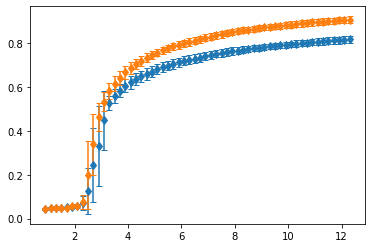

In [86]:
plt.errorbar(Ks,Mean_rs_mean_F,yerr=Mean_rs_std_F,label=r"$r_{init} = 0$",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,Mean_rs_mean_B,yerr=Mean_rs_std_B,label=r"$r_{init} = 1$",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')

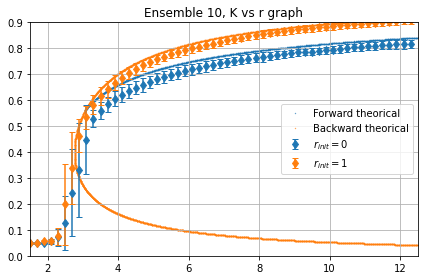

In [87]:
plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
plt.errorbar(Ks,Mean_rs_mean_F,yerr=Mean_rs_std_F,label=r"$r_{init} = 0$",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,Mean_rs_mean_B,yerr=Mean_rs_std_B,label=r"$r_{init} = 1$",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')
plt.title('Ensemble 10, K vs r graph')
plt.grid()
plt.legend()    
plt.xlim(1.5,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig(DF+f'm={m}, ensemble = 10.png',dpi=400,transparent=True)

# Hysterisis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_sim as Hys_sim
from TO_sim.for_ensemble import *


import numpy as np
seeds = np.arange(0,100)
Mean_time = int(50/dt)

m = 2
from TO_sim.Check_theoretical import *
def Draw_case12_KR(m):
    Ks = np.linspace(1,13,5000)
    KF,RF,KB,RB = map(np.array,Make_theoretical_KR(Ks,m))
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case12_KR(m)


In [142]:
# mset = [0,0.95,2,6]
# for m in mset[::-1]:
#     dK = 0.2
#     print(f'm={m}')
#     SETS = parmap.map(sim_Hystersis,seeds,m=m,dK = dK,pm_processes=16,pm_pbar=True)
#     Forward = []
#     Backward = []
#     for KSDF,KSRDF in SETS:
#         KF_ = KSDF['rs'].to_numpy()
#         KRF_ = KSRDF['rs'].to_numpy()
#         Forward.append(KF_)
#         Backward.append(KRF_)
#     Forward = np.asarray(Forward)
#     Backward = np.asarray(Backward)
#     def To_np(Array):
#         A = []
#         for i in Array:
#             Temp = []
#             for j in i:
#                 Temp.append(j)
#             A.append(Temp)
#         Array = np.array(A)
#         return Array
#     Forward = To_np(Forward)
#     Backward = To_np(Backward)
#     np.save(DF+'dK=0.2/'+f'm={m},Forward sets.npy',Forward)
#     np.save(DF+'dK=0.2/'+f'm={m},Backward sets.npy',Backward)

In [143]:
# np.save(DF+'dK=0.2/'+f'm={m},Forward sets.npy',Forward)
# np.save(DF+'dK=0.2/'+f'm={m},Backward sets.npy',Backward)

In [11]:
dK = 0.2
Forward = np.load(DF+f'dK={dK}/'+f'm={m},Forward sets.npy',allow_pickle=True)
Backward = np.load(DF+f'dK={dK}/'+f'm={m},Backward sets.npy',allow_pickle=True)


In [145]:
# Forward = []
# Backward = []
# for KSDF,KSRDF in SETS:
#     KF_ = KSDF['rs'].to_numpy()
#     KRF_ = KSRDF['rs'].to_numpy()
#     Forward.append(KF_)
#     Backward.append(KRF_)
# Forward = np.asarray(Forward)
# Backward = np.asarray(Backward)


In [12]:
def for_mean(Forward):
    A_F_mean = []
    A_F_std = []
    for ensemble in Forward:
        Mean_Kr = []
        Std_Kr = []
        for rs in ensemble:
            temp = rs[-Mean_time:]
            mean_ = np.mean(temp)
            std_ = np.std(temp)
            Mean_Kr.append(mean_)
            Std_Kr.append(std_)
        A_F_mean.append(Mean_Kr)
        A_F_std.append(Std_Kr)
    A_F_mean = np.array(A_F_mean)
    A_F_std = np.array(A_F_std)
    return A_F_mean, A_F_std

In [13]:
Ks = np.arange(0.1,12.5+dK/2,dK)
last = lambda array:array[:,-1]

In [179]:
Ks = KSDF.index

NameError: name 'KSDF' is not defined

In [14]:

def To_np(Array):
    A = []
    for i in Array:
        Temp = []
        for j in i:
            Temp.append(j)
        A.append(Temp)
    Array = np.array(A)
    return Array
Forward = To_np(Forward)
Backward = To_np(Backward)

A_ = RB[0]
idx = np.where(RB>A_)
notidx = np.where(RB<A_)
RBU = RB[idx]
KBU = KB[idx]
RBD = RB[notidx]
KBD = KB[notidx]

def draw_backward(m):
    if m==0:
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')

def draw_foward(m):
    plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')

def draw_theoretical(m):
    if m==0:
        
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')

In [15]:

ensembles_Forward = Forward[:,:,-1]
ensembles_Backward = Backward[:,::-1,-1]
A =np.mean(ensembles_Forward,axis=0)
Astd =np.std(ensembles_Forward,axis=0)

B =np.mean(ensembles_Backward,axis=0)
Bstd =np.std(ensembles_Backward,axis=0)
A_F_mean, A_F_std = for_mean(Forward)
FMean = np.mean(A_F_mean,axis=0)
FMeanStd = np.std(A_F_mean,axis=0)
FStd = np.mean(A_F_std,axis=0)

A_B_mean, A_B_std = for_mean(Backward)
BMean = np.mean(A_B_mean,axis=0)
BMeanStd = np.std(A_B_mean,axis=0)
BStd = np.mean(A_B_std,axis=0)

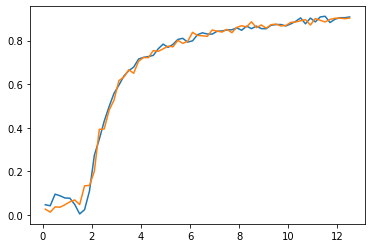

In [182]:
Test = 5
plt.plot(Ks,ensembles_Backward[Test,:]);
plt.plot(Ks,ensembles_Forward[Test,:]);

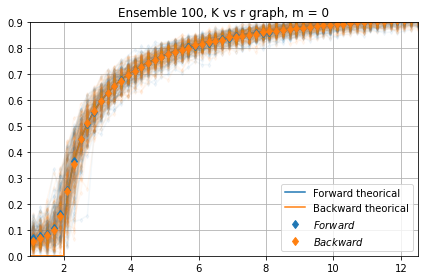

In [96]:
draw_theoretical(m)
plt.plot(Ks,ensembles_Forward.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
plt.plot(Ks,ensembles_Backward.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')
plt.plot(Ks,A,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,B,'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')

plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
# plt.savefig(DF+f'Hystersis m={m},last steps ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

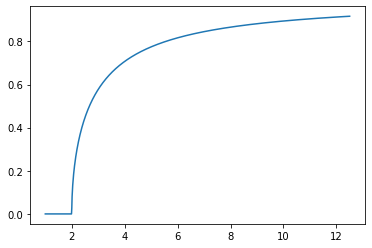

In [19]:
plt.plot(KF,RF)

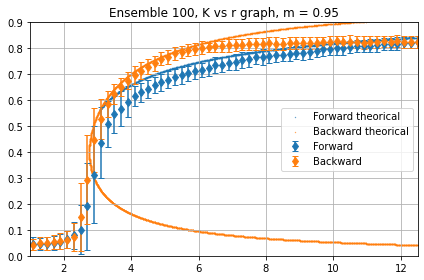

In [15]:
draw_theoretical(m)

plt.errorbar(Ks,A,yerr=Astd,label=r"Forward",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,B,yerr=Bstd,label=r"Backward",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')
plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
# plt.savefig(DF+f'Hystersis m={m}, 22 ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

In [6]:
A_F_mean, A_F_std = for_mean(Forward)
FMean = np.mean(A_F_mean,axis=0)
FMeanStd = np.std(A_F_mean,axis=0)
FStd = np.mean(A_F_std,axis=0)

A_B_mean, A_B_std = for_mean(Backward)
BMean = np.mean(A_B_mean,axis=0)
BMeanStd = np.std(A_B_mean,axis=0)
BStd = np.mean(A_B_std,axis=0)

NameError: name 'for_mean' is not defined

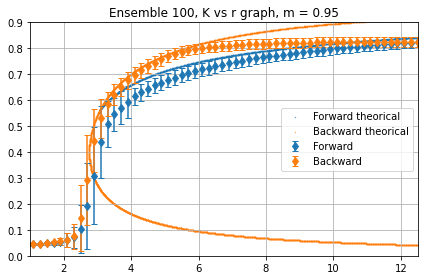

In [19]:
draw_theoretical(m)

plt.errorbar(Ks,FMean,yerr=FMeanStd,label=r"Forward",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,BMean[::-1],yerr=BMeanStd[::-1],label=r"Backward",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')
plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
# plt.savefig(DF+f'Hystersis m={m}, 2 ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)
# plt.savefig(DF+f'Hystersis m={m}, 2+ ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

In [17]:
Create_Folder(DF+'TO draw/')

In [70]:
Create_Folder(DF+'Ensemble/')


In [140]:
m = 6
dK = 0.2

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_sim as Hys_sim
from TO_sim.for_ensemble import *


import numpy as np
seeds = np.arange(0,100)
Mean_time = int(50/dt)


from TO_sim.Check_theoretical import *
def Draw_case12_KR(m):
    Ks = np.linspace(1,13,5000)
    KF,RF,KB,RB = map(np.array,Make_theoretical_KR(Ks,m))
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case12_KR(m)

Forward = np.load(DF+f'dK={dK}/'+f'm={m},Forward sets.npy',allow_pickle=True)
Backward = np.load(DF+f'dK={dK}/'+f'm={m},Backward sets.npy',allow_pickle=True)
def for_mean(Forward):
    A_F_mean = []
    A_F_std = []
    for ensemble in Forward:
        Mean_Kr = []
        Std_Kr = []
        for rs in ensemble:
            temp = rs[-Mean_time:]
            mean_ = np.mean(temp)
            std_ = np.std(temp)
            Mean_Kr.append(mean_)
            Std_Kr.append(std_)
        A_F_mean.append(Mean_Kr)
        A_F_std.append(Std_Kr)
    A_F_mean = np.array(A_F_mean)
    A_F_std = np.array(A_F_std)
    return A_F_mean, A_F_std
Ks = np.arange(0.1,12.5+dK/2,dK)
last = lambda array:array[:,-1]

def To_np(Array):
    A = []
    for i in Array:
        Temp = []
        for j in i:
            Temp.append(j)
        A.append(Temp)
    Array = np.array(A)
    return Array
Forward = To_np(Forward)
Backward = To_np(Backward)

A_ = RB[0]
idx = np.where(RB>A_)
notidx = np.where(RB<A_)
RBU = RB[idx]
KBU = KB[idx]
RBD = RB[notidx]
KBD = KB[notidx]

def draw_backward(m):
    if m==0:
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')

def draw_foward(m):
    plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')

def draw_theoretical(m):
    if m==0:
        
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')
ensembles_Forward = Forward[:,:,-1]
ensembles_Backward = Backward[:,::-1,-1]
A =np.mean(ensembles_Forward,axis=0)
Astd =np.std(ensembles_Forward,axis=0)

B =np.mean(ensembles_Backward,axis=0)
Bstd =np.std(ensembles_Backward,axis=0)
A_F_mean, A_F_std = for_mean(Forward)
FMean = np.mean(A_F_mean,axis=0)
FMeanStd = np.std(A_F_mean,axis=0)
FStd = np.mean(A_F_std,axis=0)

A_B_mean, A_B_std = for_mean(Backward)
BMean = np.mean(A_B_mean,axis=0)
BMeanStd = np.std(A_B_mean,axis=0)
BStd = np.mean(A_B_std,axis=0)

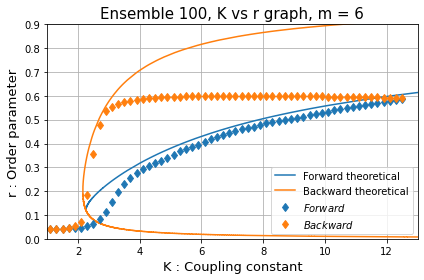

In [142]:
draw_theoretical(m)

# plt.plot(Ks,A_F_mean.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
# plt.plot(Ks,A_B_mean[:,::-1].T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')

plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}',fontsize= 15)
plt.grid()
plt.legend()    
plt.xlim(1,13)
plt.ylim(0,0.9)
plt.tight_layout()

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+'Ensemble/'+f'simple ver. Hystersis m={m},dK={dK}, ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

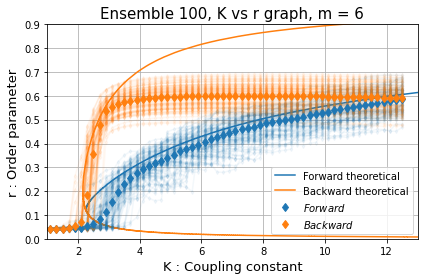

In [143]:
draw_theoretical(m)

plt.plot(Ks,A_F_mean.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
plt.plot(Ks,A_B_mean[:,::-1].T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')

plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}',fontsize= 15)
plt.grid()
plt.legend()    
plt.xlim(1,13)
plt.ylim(0,0.9)
plt.tight_layout()

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+'Ensemble/'+f'All trajectory ver. Hystersis m={m},dK={dK}, ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

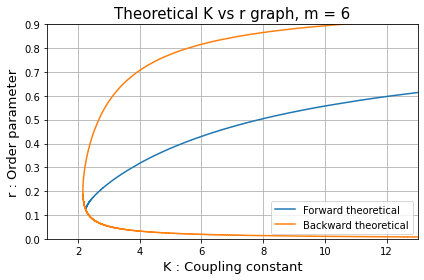

In [144]:
draw_theoretical(m)

plt.title(f'Theoretical K vs r graph, m = {m}',fontsize= 15)
plt.grid()
plt.legend()    
plt.xlim(1,13)
plt.ylim(0,0.9)
plt.tight_layout()

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+'Ensemble/'+f'Theoretical graph m ={m}.png',dpi=400,transparent=True)

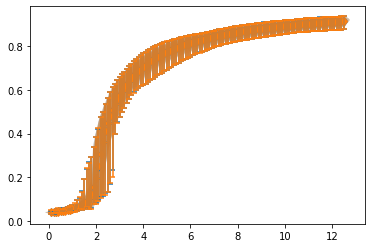

In [19]:
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_F_mean,Ks.to_list());
plt.violinplot(A_B_mean[:,::-1],Ks.to_list());

In [37]:
Ks = Ks.to_list()

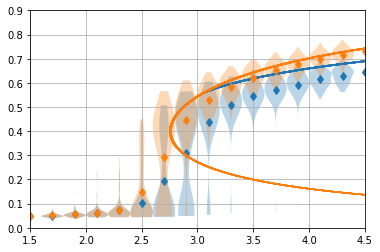

In [88]:
# plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
# plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
Ks_start= np.searchsorted(Ks,1.6)
Ks_end= np.searchsorted(Ks,4.5)
plt.figure(figsize=(15,5))
draw_foward(m)
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.violinplot(A_F_mean[:,::1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=0.2,showextrema=False);

draw_backward(m)
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_B_mean[:,::-1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=0.2,showextrema=False);
plt.xlim(1.5,4.5)
plt.ylim(0,0.9)
plt.grid()
# A_B_mean[3,::-1].shape

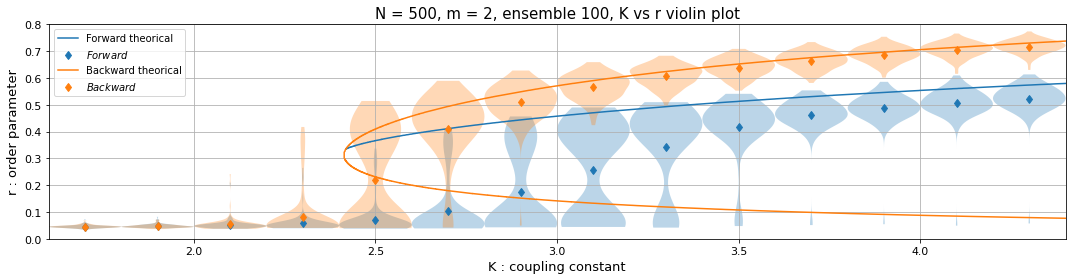

In [17]:
# plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
# plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
Ks_start= np.searchsorted(Ks,1.6)
Ks_end= np.searchsorted(Ks,4.5)
plt.figure(figsize=(15,4))
draw_foward(m)
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.violinplot(A_F_mean[:,::1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=0.2,showextrema=False);

draw_backward(m)
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_B_mean[:,::-1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=0.2,showextrema=False);
plt.xlim(1.6,4.4)
plt.ylim(0,0.8)
plt.xlabel('K : coupling constant',fontsize= 13)
plt.ylabel('r : order parameter',fontsize= 13)
plt.title(f'N = 500, m = {m}, ensemble 100, K vs r violin plot',fontsize=15)
plt.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.tight_layout()
plt.savefig(DF+'TO draw/'+f'm = {m} ensemble 100 violinplot.png',dpi=500)
# A_B_mean[3,::-1].shape

In [108]:
Forward.shape

(100, 63, 8001)

(1.5, 5.0)

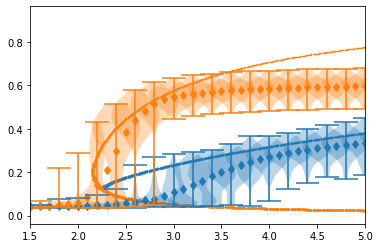

In [55]:
draw_theoretical(m)
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_F_mean[:,::1][:,15:60:2],Ks[15:60:2]);
plt.violinplot(A_B_mean[:,::-1][:,15:60:2],Ks[15:60:2]);
plt.xlim(1.5,5)
# A_B_mean[3,::-1].shape

(1.5, 5.0)

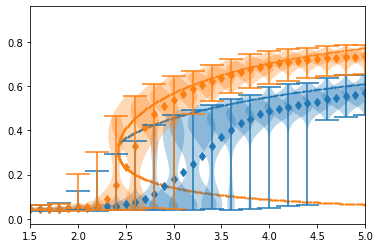

In [28]:
plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_F_mean[:,::1][:,15:60:2],Ks[15:60:2]);
plt.violinplot(A_B_mean[:,::-1][:,15:60:2],Ks[15:60:2]);
plt.xlim(1.5,5)
# A_B_mean[3,::-1].shape

(2.0, 6.0)

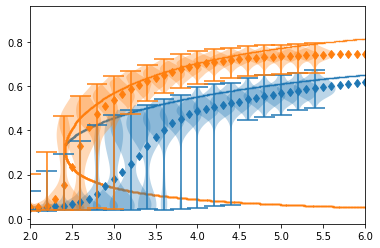

In [45]:

plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_F_mean[:,::1][:,15:55:2],Ks[15:55:2]);
plt.violinplot(A_B_mean[:,::-1][:,15:55:2],Ks[15:55:2]);
plt.xlim(2,6)
# A_B_mean[3,::-1].shape

(2.0, 4.2)

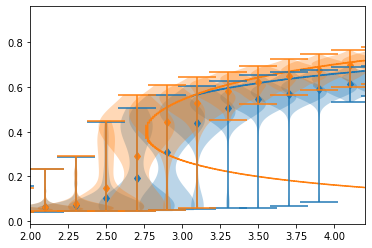

In [37]:
draw_theoretical(m)

plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_F_mean[:,::1][:,1:55:1],Ks[1:55:1]);
plt.violinplot(A_B_mean[:,::-1][:,1:55:1],Ks[1:55:1]);
plt.xlim(2,4.2)
# A_B_mean[3,::-1].shape

In [122]:
m = 0
Forward = np.load(DF+'dK=0.1/'+f'm={m},Forward sets.npy',allow_pickle=True)
Backward = np.load(DF+'dK=0.1/'+f'm={m},Backward sets.npy',allow_pickle=True)
from TO_sim.Check_theoretical import *
def Draw_case12_KR(m):
    Ks = np.linspace(1,13,2000)
    KF,RF,KB,RB = Make_theoretical_KR(Ks,m)
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case12_KR(m)

In [123]:
def To_np(Array):
    A = []
    for i in Array:
        Temp = []
        for j in i:
            Temp.append(j)
        A.append(Temp)
    Array = np.array(A)
    return Array
Forward = To_np(Forward)
Backward = To_np(Backward)

In [128]:
num = 3
F_sim = Forward[num,:,-500:]
B_sim = Backward[num,:,-500:]
F_mean = np.mean(F_sim,axis=1)
F_std = np.std(F_sim,axis=1)
B_mean = np.mean(B_sim,axis=1)
B_std = np.std(B_sim,axis=1)


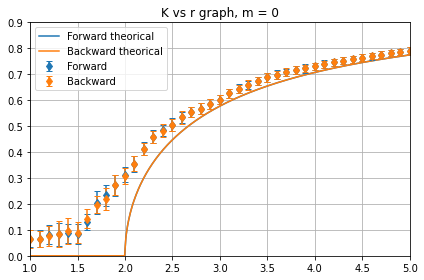

In [127]:
# plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
# plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')

plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
# plt.plot(Ks,A_F_mean.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
# plt.plot(Ks,A_B_mean[:,::-1].T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')

plt.errorbar(Ks,F_mean,yerr=F_std,label=r"Forward",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,B_mean[::-1],yerr=B_std[::-1],label=r"Backward",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')

plt.title(f'K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,5)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig(DF+f'Hystersis m={m},single ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

In [44]:
Ks = np.arange(0.1,12.5+0.1/2,0.1)


(1.5, 5.0)

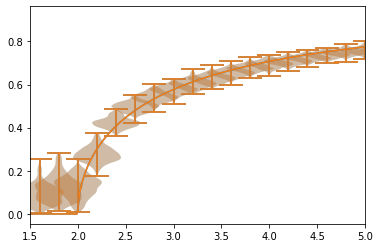

In [50]:
plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
plt.violinplot(F_sim.T[:,::1][:,15:55:2],Ks[15:55:2]);
plt.violinplot(F_sim.T[:,::1][:,15:55:2],Ks[15:55:2]);

plt.xlim(1.5,5)

In [153]:
m = 0
dK = 0.2


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_sim as Hys_sim
from TO_sim.for_ensemble import *


import numpy as np
seeds = np.arange(0,100)
Mean_time = int(50/dt)


from TO_sim.Check_theoretical import *
def Draw_case12_KR(m):
    Ks = np.linspace(1,13,5000)
    KF,RF,KB,RB = map(np.array,Make_theoretical_KR(Ks,m))
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case12_KR(m)

Forward = np.load(DF+f'dK={dK}/'+f'm={m},Forward sets.npy',allow_pickle=True)
Backward = np.load(DF+f'dK={dK}/'+f'm={m},Backward sets.npy',allow_pickle=True)
def for_mean(Forward):
    A_F_mean = []
    A_F_std = []
    for ensemble in Forward:
        Mean_Kr = []
        Std_Kr = []
        for rs in ensemble:
            temp = rs[-Mean_time:]
            mean_ = np.mean(temp)
            std_ = np.std(temp)
            Mean_Kr.append(mean_)
            Std_Kr.append(std_)
        A_F_mean.append(Mean_Kr)
        A_F_std.append(Std_Kr)
    A_F_mean = np.array(A_F_mean)
    A_F_std = np.array(A_F_std)
    return A_F_mean, A_F_std
Ks = np.arange(0.1,12.5+dK/2,dK)
last = lambda array:array[:,-1]

def To_np(Array):
    A = []
    for i in Array:
        Temp = []
        for j in i:
            Temp.append(j)
        A.append(Temp)
    Array = np.array(A)
    return Array
Forward = To_np(Forward)
Backward = To_np(Backward)

A_ = RB[0]
idx = np.where(RB>A_)
notidx = np.where(RB<A_)
RBU = RB[idx]
KBU = KB[idx]
RBD = RB[notidx]
KBD = KB[notidx]

def draw_backward(m):
    if m==0:
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')

def draw_foward(m):
    plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')

def draw_theoretical(m):
    if m==0:
        
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KB,RB,color = 'Tab:Orange',label='Backward theoretical')
    else:
        plt.plot(KF,RF,color = 'Tab:blue',label='Forward theoretical')
        plt.plot(KBU,RBU,color = 'Tab:Orange',label='Backward theoretical')
        plt.plot(KBD,RBD,color = 'Tab:Orange')
ensembles_Forward = Forward[:,:,-1]
ensembles_Backward = Backward[:,::-1,-1]
A =np.mean(ensembles_Forward,axis=0)
Astd =np.std(ensembles_Forward,axis=0)

B =np.mean(ensembles_Backward,axis=0)
Bstd =np.std(ensembles_Backward,axis=0)
A_F_mean, A_F_std = for_mean(Forward)
FMean = np.mean(A_F_mean,axis=0)
FMeanStd = np.std(A_F_mean,axis=0)
FStd = np.mean(A_F_std,axis=0)

A_B_mean, A_B_std = for_mean(Backward)
BMean = np.mean(A_B_mean,axis=0)
BMeanStd = np.std(A_B_mean,axis=0)
BStd = np.mean(A_B_std,axis=0)

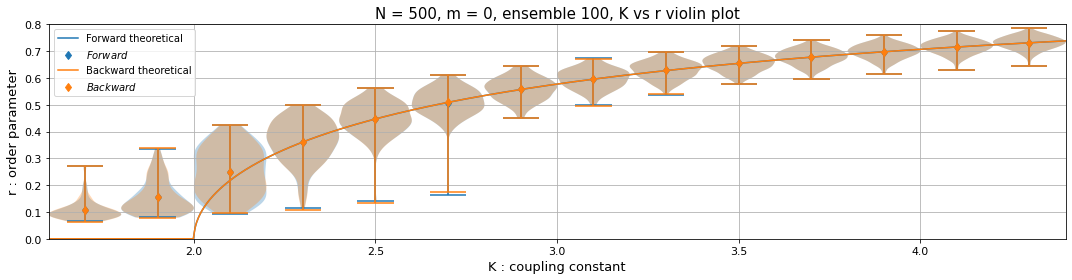

In [155]:
# plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theoretical')
# plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theoretical')
Ks_start= np.searchsorted(Ks,1.6)
Ks_end= np.searchsorted(Ks,4.5)
plt.figure(figsize=(15,4))
draw_foward(m)
plt.plot(Ks,FMean,'d',label=r"$Forward$",markersize=6,color = 'Tab:Blue')
plt.violinplot(A_F_mean[:,::1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=dK,showextrema=True);

draw_backward(m)
plt.plot(Ks,BMean[::-1],'d',label=r"$Backward$",markersize=6,color = 'Tab:Orange')
plt.violinplot(A_B_mean[:,::-1][:,Ks_start:Ks_end:1],Ks[Ks_start:Ks_end:1],widths=dK,showextrema=True);
plt.xlim(1.6,4.4)
plt.ylim(0,0.8)
plt.xlabel('K : coupling constant',fontsize= 13)
plt.ylabel('r : order parameter',fontsize= 13)
plt.title(f'N = 500, m = {m}, ensemble 100, K vs r violin plot',fontsize=15)
plt.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.tight_layout()
# plt.savefig(DF+'TO draw/'+f'm = {m},dK ={dK} ensemble 100 violinplot.png',dpi=500)
plt.savefig(DF+'TO draw/'+f'Extrema m = {m},dK ={dK} ensemble 100 violinplot.png',dpi=500)
# A_B_mean[3,::-1].shape

In [40]:
# DF = DF + 'theoretical/'
Create_Folder(DF)

In [42]:
from TO_sim.To_Draw import Draw_theoretical

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:24: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


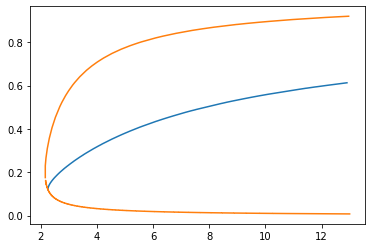

In [43]:
m = 6
Draw_ = Draw_theoretical(m)
Draw_.total()

In [ ]:
Draw_.total()
# plt.plot(Ks,A_F_mean.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
# plt.plot(Ks,A_B_mean[:,::-1].T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')

plt.title(f'Theoretical, K vs r graph, m = {m}',fontsize= 15)
plt.grid()
plt.legend()    
plt.xlim(1,13)
plt.ylim(0,0.9)
plt.tight_layout()

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+'TO draw/'+f'simple ver. Hystersis m={m}, ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)